In [1]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.layers import Dropout



from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [7]:
df = pd.read_csv('C:/Users/DELL 7280/Downloads/MSN.csv')
df = df.drop(columns=["Ticker", "Open Interest"])
print(df)

               Date/Time  Open  High   Low  Close  Volume
0        12/25/2017 9:15  73.1  73.1  73.1   73.1    4210
1        12/25/2017 9:16  73.0  73.0  73.0   73.0    5000
2        12/25/2017 9:18  73.5  73.5  73.5   73.5     210
3        12/25/2017 9:20  73.2  73.5  73.1   73.1    2050
4        12/25/2017 9:21  73.0  73.0  73.0   73.0    1380
...                  ...   ...   ...   ...    ...     ...
135349  12/22/2020 14:23  82.8  82.8  82.8   82.8     700
135350  12/22/2020 14:24  82.7  82.8  82.7   82.8    4660
135351  12/22/2020 14:25  82.8  82.8  82.8   82.8      50
135352  12/22/2020 14:27  82.8  82.8  82.8   82.8     300
135353  12/22/2020 14:46  82.8  82.8  82.8   82.8     200

[135354 rows x 6 columns]


In [5]:
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M")

In [6]:
df.shape

(135354, 6)

In [8]:
df.head()

,Date/Time,Open,High,Low,Close,Volume
0,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210
1,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000
2,12/25/2017 9:18,73.5,73.5,73.5,73.5,210
3,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050
4,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  135354 non-null  object 
 1   Open       135354 non-null  float64
 2   High       135354 non-null  float64
 3   Low        135354 non-null  float64
 4   Close      135354 non-null  float64
 5   Volume     135354 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06


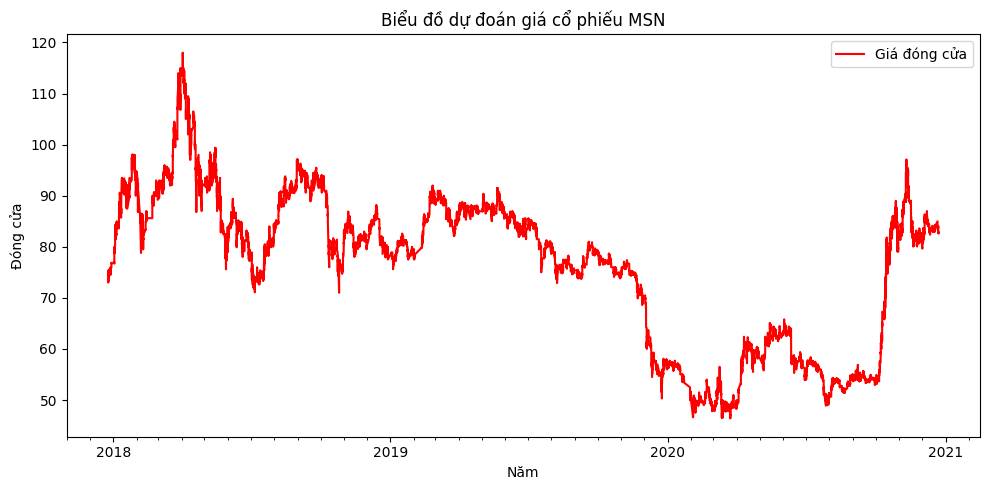

In [14]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator


df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')


df = df.sort_values(by='Date/Time')


df['Năm'] = df['Date/Time'].dt.year


plt.figure(figsize=(10, 5))
plt.plot(df['Date/Time'], df['Close'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Đóng cửa')
plt.title('Biểu đồ dự đoán giá cổ phiếu MSN')
plt.legend(loc='best')


years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.show()

In [15]:
df1 = pd.DataFrame(df,columns=['Date/Time','Close'])
df1.index = df1['Date/Time']
df1.drop('Date/Time',axis=1,inplace=True)
df1

,Close
Date/Time,
2017-12-25 09:15:00,73.1
2017-12-25 09:16:00,73.0
2017-12-25 09:18:00,73.5
2017-12-25 09:20:00,73.1
2017-12-25 09:21:00,73.0
...,...
2020-12-22 14:23:00,82.8
2020-12-22 14:24:00,82.8
2020-12-22 14:25:00,82.8


In [16]:
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [17]:
data

array([[73.1],
       [73. ],
       [73.5],
       ...,
       [82.8],
       [82.8],
       [82.8]])

In [18]:
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [19]:
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0])
  y_train.append(sc_train[i,0])

In [20]:
x_train

[array([0.37290503, 0.37150838, 0.37849162, 0.37290503, 0.37150838,
        0.37290503, 0.37290503, 0.37569832, 0.37849162, 0.37569832,
        0.37290503, 0.37290503, 0.37290503, 0.37569832, 0.37569832,
        0.37569832, 0.37430168, 0.37569832, 0.37569832, 0.37430168,
        0.37290503, 0.37430168, 0.37290503, 0.37150838, 0.37150838,
        0.37150838, 0.37150838, 0.37290503, 0.37150838, 0.37150838,
        0.37290503, 0.37290503, 0.37290503, 0.37430168, 0.37569832,
        0.37569832, 0.37849162, 0.38268156, 0.38268156, 0.38547486,
        0.38547486, 0.38547486, 0.38547486, 0.38826816, 0.38547486,
        0.38547486, 0.38547486, 0.38547486, 0.38547486, 0.38826816]),
 array([0.37150838, 0.37849162, 0.37290503, 0.37150838, 0.37290503,
        0.37290503, 0.37569832, 0.37849162, 0.37569832, 0.37290503,
        0.37290503, 0.37290503, 0.37569832, 0.37569832, 0.37569832,
        0.37430168, 0.37569832, 0.37569832, 0.37430168, 0.37290503,
        0.37430168, 0.37290503, 0.37150838, 0.

In [21]:
y_train

[0.3868715083798884,
 0.3868715083798884,
 0.3868715083798884,
 0.3868715083798884,
 0.3854748603351956,
 0.3840782122905029,
 0.3840782122905029,
 0.3826815642458101,
 0.3812849162011174,
 0.3812849162011174,
 0.3840782122905029,
 0.3812849162011174,
 0.3812849162011174,
 0.3784916201117319,
 0.3784916201117319,
 0.37709497206703935,
 0.3756983240223464,
 0.37709497206703935,
 0.3756983240223464,
 0.37709497206703935,
 0.37709497206703935,
 0.37709497206703935,
 0.37709497206703935,
 0.37709497206703935,
 0.3854748603351956,
 0.37709497206703935,
 0.3784916201117319,
 0.3784916201117319,
 0.3784916201117319,
 0.3854748603351956,
 0.3784916201117319,
 0.3854748603351956,
 0.3840782122905029,
 0.3812849162011174,
 0.3826815642458101,
 0.3840782122905029,
 0.3854748603351956,
 0.3854748603351956,
 0.3854748603351956,
 0.3868715083798884,
 0.3882681564245811,
 0.3882681564245811,
 0.3882681564245811,
 0.3882681564245811,
 0.3882681564245811,
 0.3896648044692739,
 0.3896648044692739,
 0.39

In [22]:
x_train = np.array(x_train)
y_train = np.array(y_train)


x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

In [23]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1], 1)))


model.add(LSTM(units=128, return_sequences=True))


model.add(LSTM(units=64))

# Dropout để ngăn overfitting
model.add(Dropout(0.5))

# Lớp Dense cuối cùng với đầu ra là 1 giá trị
model.add(Dense(1))

# Compile mô hình
model.compile(loss='mean_absolute_error', optimizer='adam')


In [24]:
save_model = "C:/Users/DELL 7280/Downloads/save_model.keras"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.10550, saving model to C:/Users/DELL 7280/Downloads/save_model.keras
29/29 - 5s - 181ms/step - loss: 0.1055
Epoch 2/100

Epoch 2: loss improved from 0.10550 to 0.06209, saving model to C:/Users/DELL 7280/Downloads/save_model.keras
29/29 - 2s - 63ms/step - loss: 0.0621
Epoch 3/100

Epoch 3: loss improved from 0.06209 to 0.05622, saving model to C:/Users/DELL 7280/Downloads/save_model.keras
29/29 - 2s - 66ms/step - loss: 0.0562
Epoch 4/100

Epoch 4: loss improved from 0.05622 to 0.05190, saving model to C:/Users/DELL 7280/Downloads/save_model.keras
29/29 - 2s - 63ms/step - loss: 0.0519
Epoch 5/100

Epoch 5: loss improved from 0.05190 to 0.05136, saving model to C:/Users/DELL 7280/Downloads/save_model.keras
29/29 - 2s - 60ms/step - loss: 0.0514
Epoch 6/100

Epoch 6: loss improved from 0.05136 to 0.04843, saving model to C:/Users/DELL 7280/Downloads/save_model.keras
29/29 - 2s - 77ms/step - loss: 0.0484
Epoch 7/100

Epoch 7: loss improved f

In [25]:
y_train = sc.inverse_transform(y_train)
final_model = load_model("C:/Users/DELL 7280/Downloads/save_model.keras")
y_train_predict = final_model.predict(x_train)
y_train_predict = sc.inverse_transform(y_train_predict)

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [26]:
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


y_test = data[1500:]
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict)

4183/4183 ━━━━━━━━━━━━━━━━━━━━ 112s 27ms/step


C:\Users\DELL 7280\AppData\Local\Temp\ipykernel_9628\347224890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict
C:\Users\DELL 7280\AppData\Local\Temp\ipykernel_9628\347224890.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict


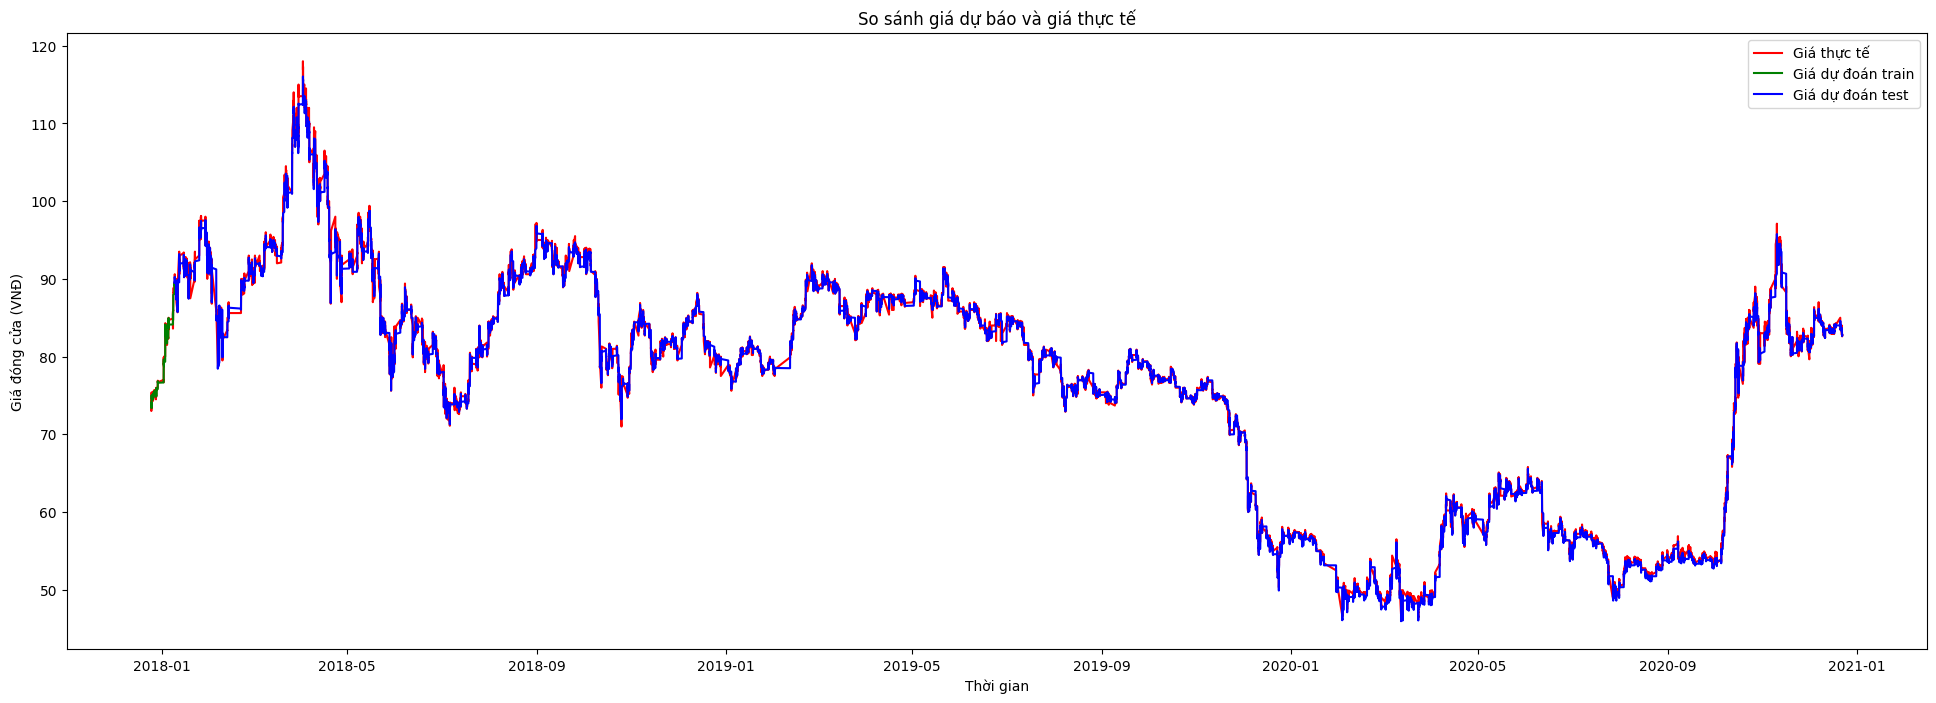

In [27]:
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red')
train_data1['Dự đoán'] = y_train_predict
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green')
test_data1['Dự đoán'] = y_test_predict
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue')
plt.title('So sánh giá dự báo và giá thực tế')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.legend()
plt.show()

In [28]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.9966457506412157
Sai số tuyệt đối trung bình trên tập train (VNĐ): 0.19822770743534474
Phần trăm sai số tuyệt đối trung bình tập train: 0.002440199455661697


In [29]:
train_data1

,Close,Dự đoán
Date/Time,,
2017-12-25 10:55:00,74.1,74.092224
2017-12-25 10:57:00,74.1,74.098221
2017-12-25 10:59:00,74.1,74.103439
2017-12-25 11:00:00,74.1,74.107597
2017-12-25 11:02:00,74.0,74.110596
...,...,...
2018-01-09 13:05:00,89.6,89.385170
2018-01-09 13:09:00,89.7,89.404976
2018-01-09 13:10:00,89.7,89.432991


In [30]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.9994717368278815
Sai số tuyệt đối trung bình trên tập test (VNĐ): 0.23670478216509236
Phần trăm sai số tuyệt đối trung bình tập test: 0.003360655739861174


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


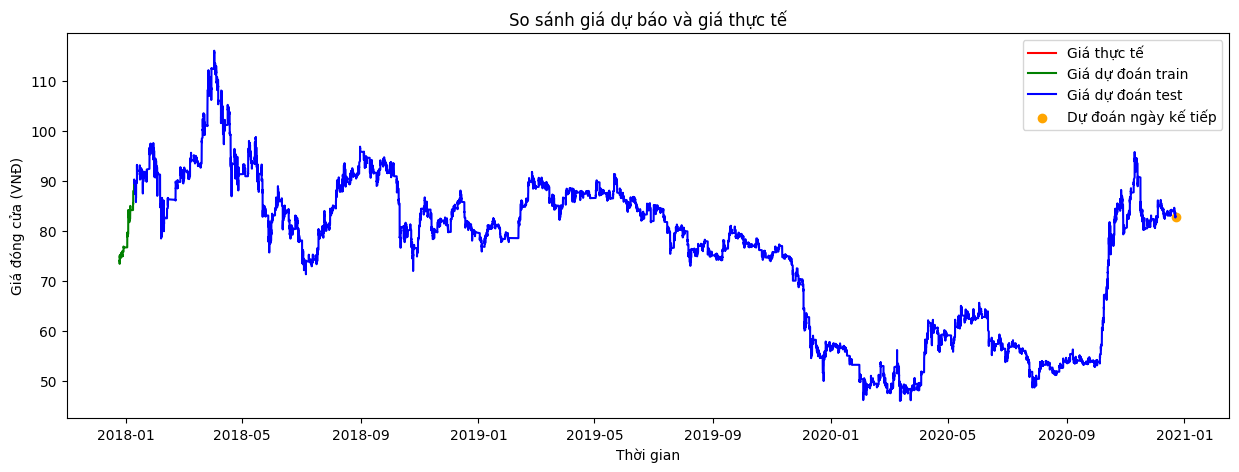

In [31]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
next_date = df['Date/Time'].iloc[-1] + pd.Timedelta(days=1)


next_date = pd.to_datetime(next_date)


next_closing_price = np.array([df['Close'].iloc[-1]])


next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))


x_next = np.array([sc_train[-50:, 0]])
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)


df_next = pd.DataFrame({'Date/Time': [next_date], 'Close': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])


plt.figure(figsize=(15, 5))
plt.plot(df1['Date/Time'], df1['Close'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [32]:
actual_closing_price = df['Close'].iloc[-1]


comparison_df = pd.DataFrame({'date': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})


print(comparison_df)

                 date  Giá dự đoán  Giá ngày trước
0 2020-12-23 14:46:00    82.785431            82.8
